# Analyze students data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [2]:
students = pd.read_csv('Data/students.csv')

In [3]:
students.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Opt_Male,Opt_Female,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,142,253,163,278,11478,9686,7338,3889,3724,1423
1,Summer 2014,14797,7198,7599,10463,580,1803,1233,718,24.1,...,70,129,92,152,4625,3590,2915,1486,1611,570
2,Fall 2014,40914,20730,20184,31722,1325,4111,2179,1577,23.1,...,144,252,166,293,11855,10994,8215,4173,4025,1652
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,143,245,166,290,11211,10530,7956,3885,3860,1590
4,Summer 2015,14216,6747,7469,10915,564,1629,460,648,23.8,...,66,120,80,152,4444,3818,2989,1390,964,611


## Create a column of terms and years

In [4]:
semester_split = students.Semester.str.split()
students['Term'] = [semester_split[i][0] for i in range(len(students))]
students['Year'] = [semester_split[i][1] for i in range(len(students))]

students.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014
1,Summer 2014,14797,7198,7599,10463,580,1803,1233,718,24.1,...,92,152,4625,3590,2915,1486,1611,570,Summer,2014
2,Fall 2014,40914,20730,20184,31722,1325,4111,2179,1577,23.1,...,166,293,11855,10994,8215,4173,4025,1652,Fall,2014
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015
4,Summer 2015,14216,6747,7469,10915,564,1629,460,648,23.8,...,80,152,4444,3818,2989,1390,964,611,Summer,2015


## EDA for each term

In [5]:
students_spring = students[students.Term == 'Spring'].copy()
students_summer = students[students.Term == 'Summer'].copy()
students_fall = students[students.Term == 'Fall'].copy()

In [6]:
students_spring.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015
6,Spring 2016,40285,20423,19862,31374,1425,3852,2096,1538,23.2,...,167,299,11129,11118,8284,3959,3880,1915,Spring,2016
9,Spring 2017,41411,20945,20466,32502,1303,3927,2122,1557,23.1,...,164,323,11080,12084,8638,3974,3714,1921,Spring,2017
12,Spring 2018,42360,21288,21072,33683,1131,3819,2143,1584,22.9,...,180,321,10884,13042,8757,4090,3511,2076,Spring,2018


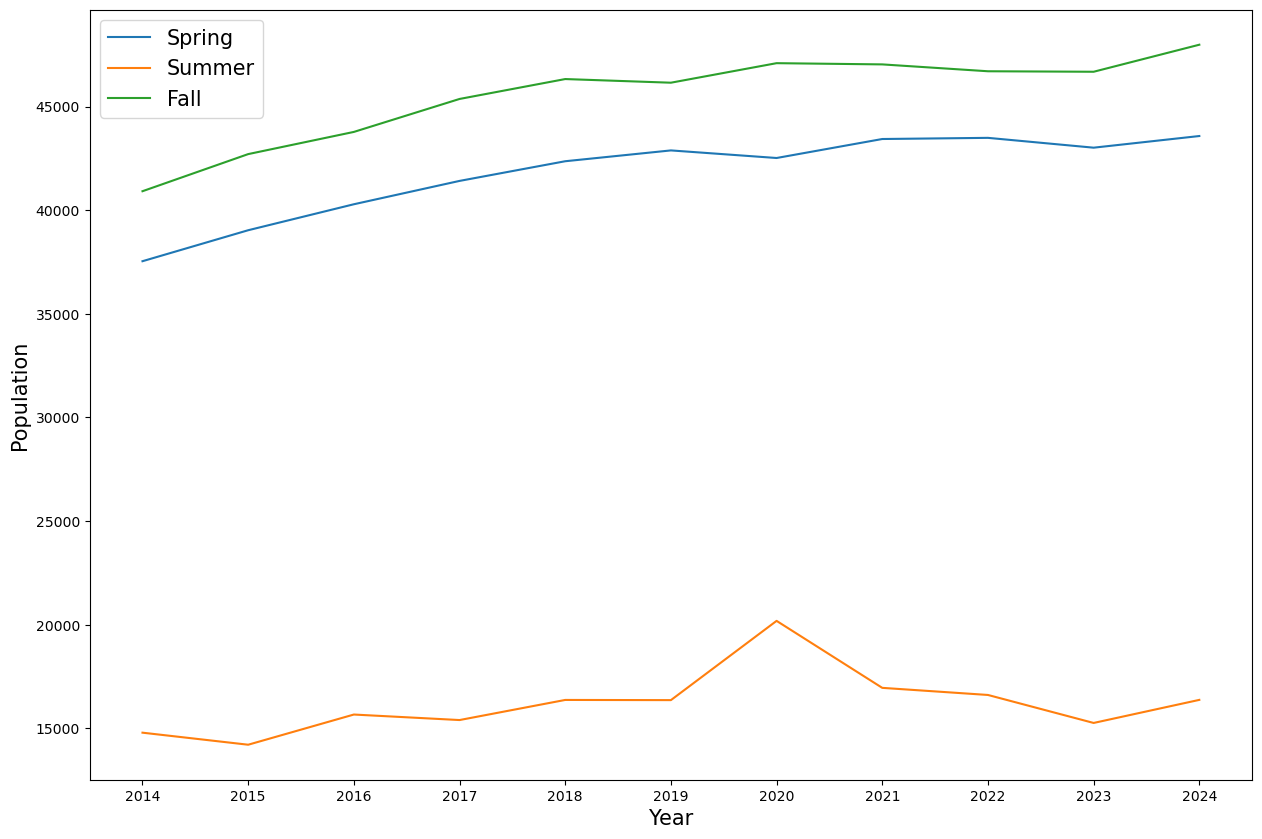

In [36]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Total_enrollment, label = 'Spring')
plt.plot(students_summer.Year, students_summer.Total_enrollment, label = 'Summer')
plt.plot(students_fall.Year, students_fall.Total_enrollment, label = 'Fall')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
#plt.title('Semesters: Spring & Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

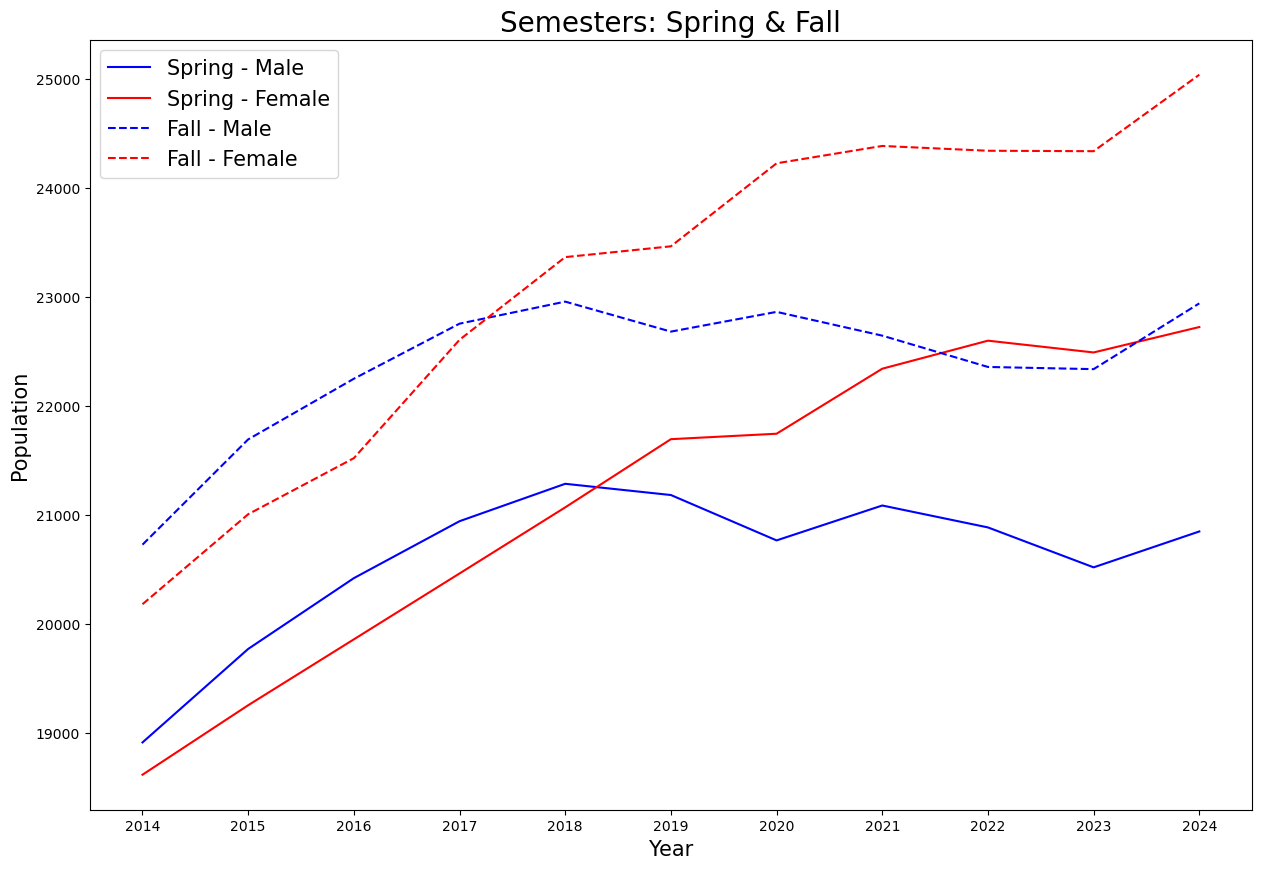

In [35]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(students_spring.Year, students_spring.Female, color = 'r', label = 'Spring - Female')
plt.plot(students_fall.Year, students_fall.Male, linestyle = '--', color = 'b', label = 'Fall - Male')
plt.plot(students_fall.Year, students_fall.Female, linestyle = '--', color = 'r', label = 'Fall - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semesters: Spring & Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

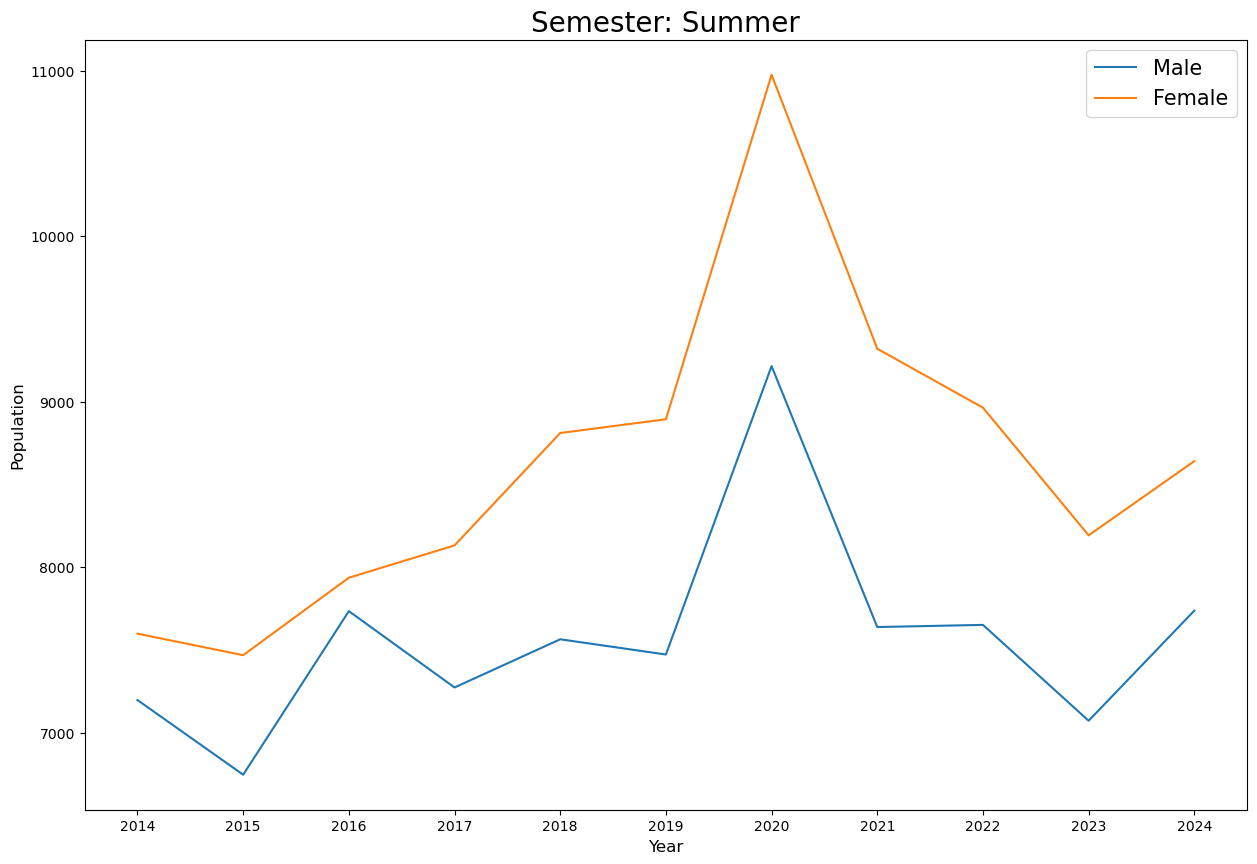

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(students_summer.Year, students_summer.Male, label = 'Male')
plt.plot(students_summer.Year, students_summer.Female, label = 'Female')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title('Semester: Summer', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## Average Age

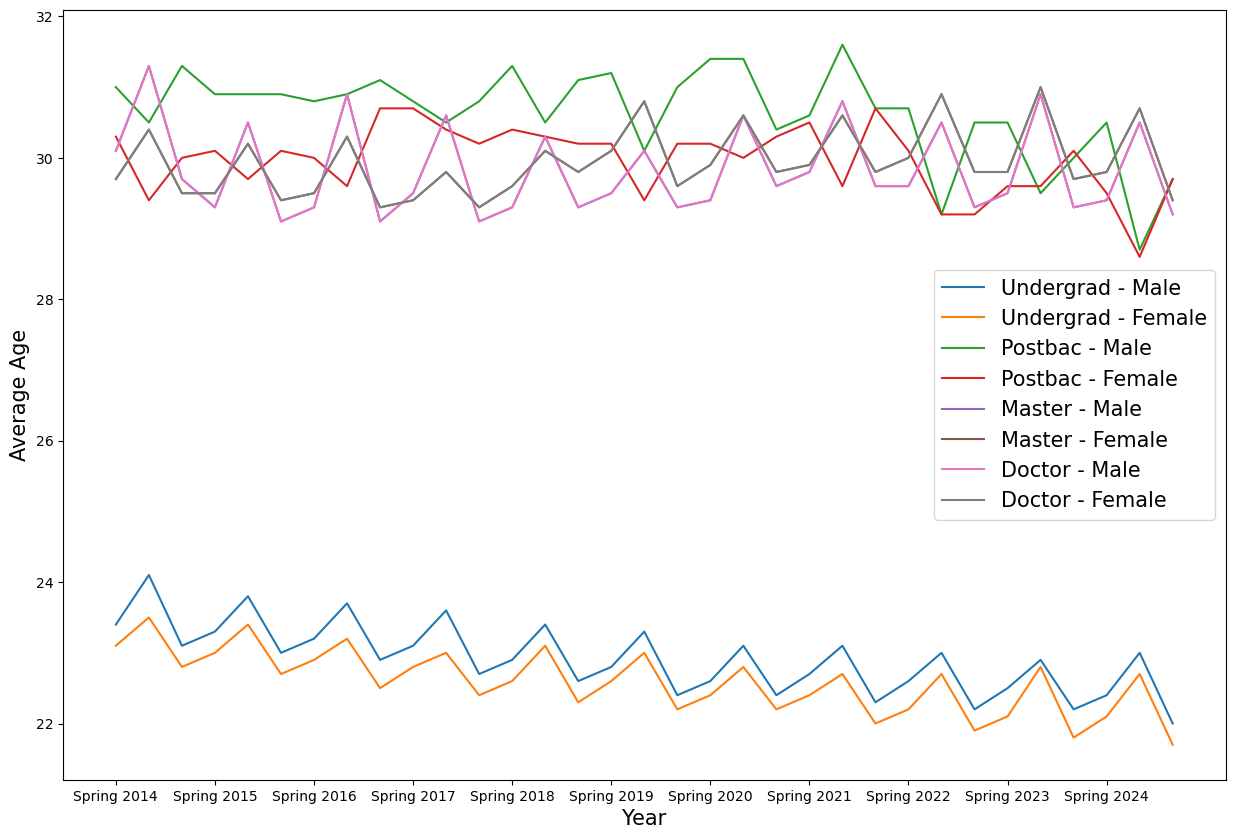

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(students.Semester, students.Age_Undergrad_Male, label = 'Undergrad - Male')
plt.plot(students.Semester, students.Age_Undergrad_Female, label = 'Undergrad - Female')
plt.plot(students.Semester, students.Age_Postbac_Male, label = 'Postbac - Male')
plt.plot(students.Semester, students.Age_Postbac_Female, label = 'Postbac - Female')
plt.plot(students.Semester, students.Age_Master_Male, label = 'Master - Male')
plt.plot(students.Semester, students.Age_Master_Female, label = 'Master - Female')
plt.plot(students.Semester, students.Age_Master_Male, label = 'Doctor - Male')
plt.plot(students.Semester, students.Age_Master_Female, label = 'Doctor - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Age', fontsize=15)
plt.xticks([students.Semester.iloc[x] for x in range(0, len(students), 3)])
plt.legend(fontsize = 15)
plt.show()

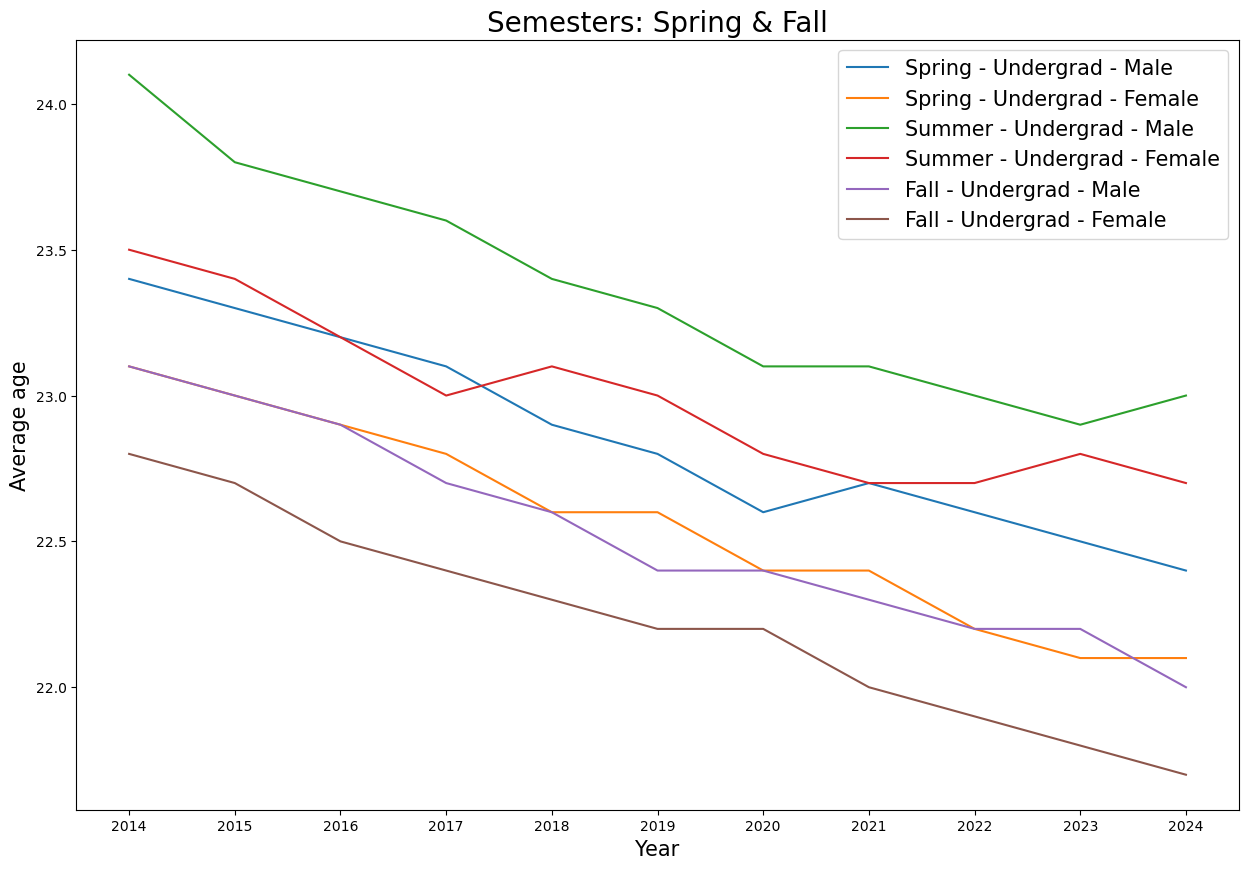

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Age_Undergrad_Male, label = 'Spring - Undergrad - Male')
plt.plot(students_spring.Year, students_spring.Age_Undergrad_Female, label = 'Spring - Undergrad - Female')
plt.plot(students_summer.Year, students_summer.Age_Undergrad_Male, label = 'Summer - Undergrad - Male')
plt.plot(students_summer.Year, students_summer.Age_Undergrad_Female, label = 'Summer - Undergrad - Female')
plt.plot(students_fall.Year, students_fall.Age_Undergrad_Male, label = 'Fall - Undergrad - Male')
plt.plot(students_fall.Year, students_fall.Age_Undergrad_Female, label = 'Fall - Undergrad - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average age', fontsize=15)
plt.title('Semesters: Spring & Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

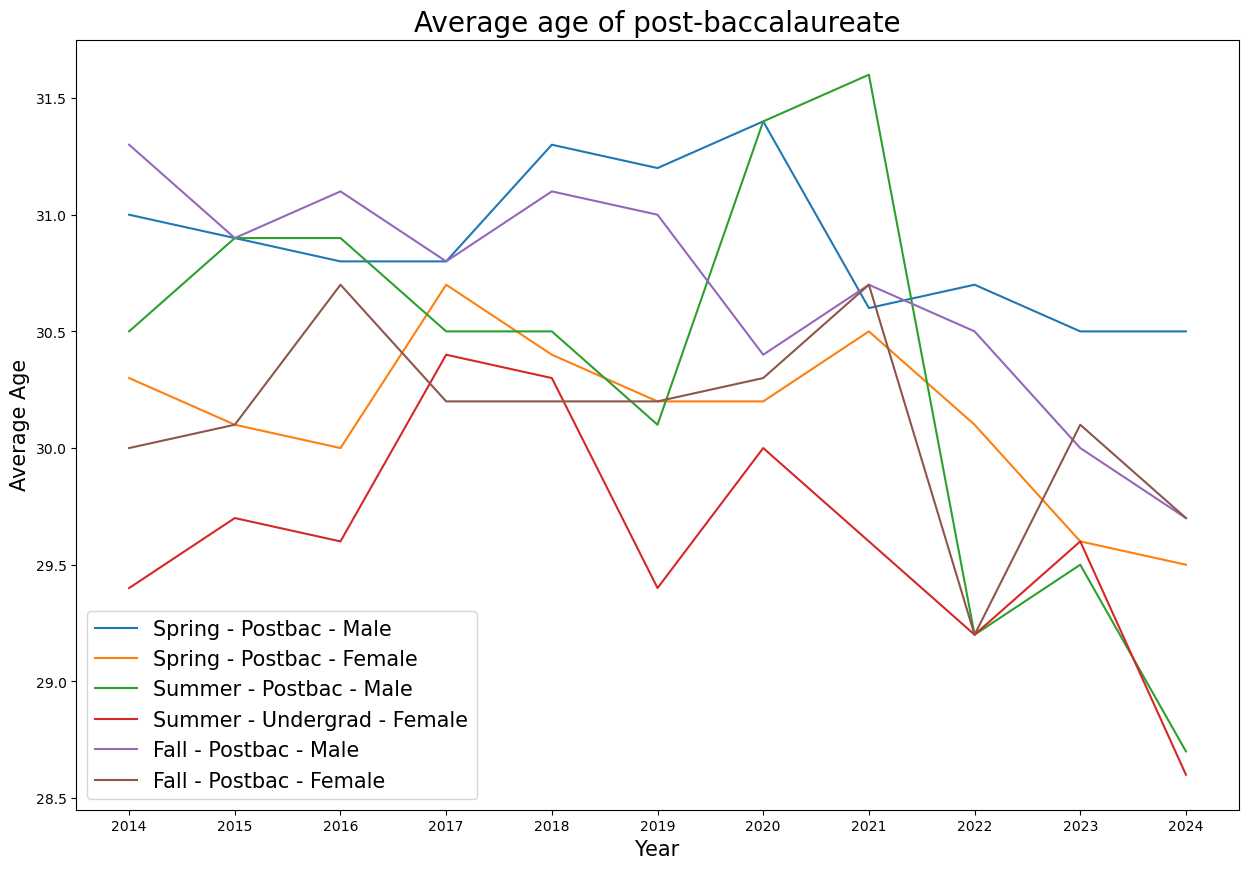

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Age_Postbac_Male, label = 'Spring - Postbac - Male')
plt.plot(students_spring.Year, students_spring.Age_Postbac_Female, label = 'Spring - Postbac - Female')
plt.plot(students_summer.Year, students_summer.Age_Postbac_Male, label = 'Summer - Postbac - Male')
plt.plot(students_summer.Year, students_summer.Age_Postbac_Female, label = 'Summer - Undergrad - Female')
plt.plot(students_fall.Year, students_fall.Age_Postbac_Male, label = 'Fall - Postbac - Male')
plt.plot(students_fall.Year, students_fall.Age_Postbac_Female, label = 'Fall - Postbac - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Age', fontsize=15)
plt.title('Average age of post-baccalaureate', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

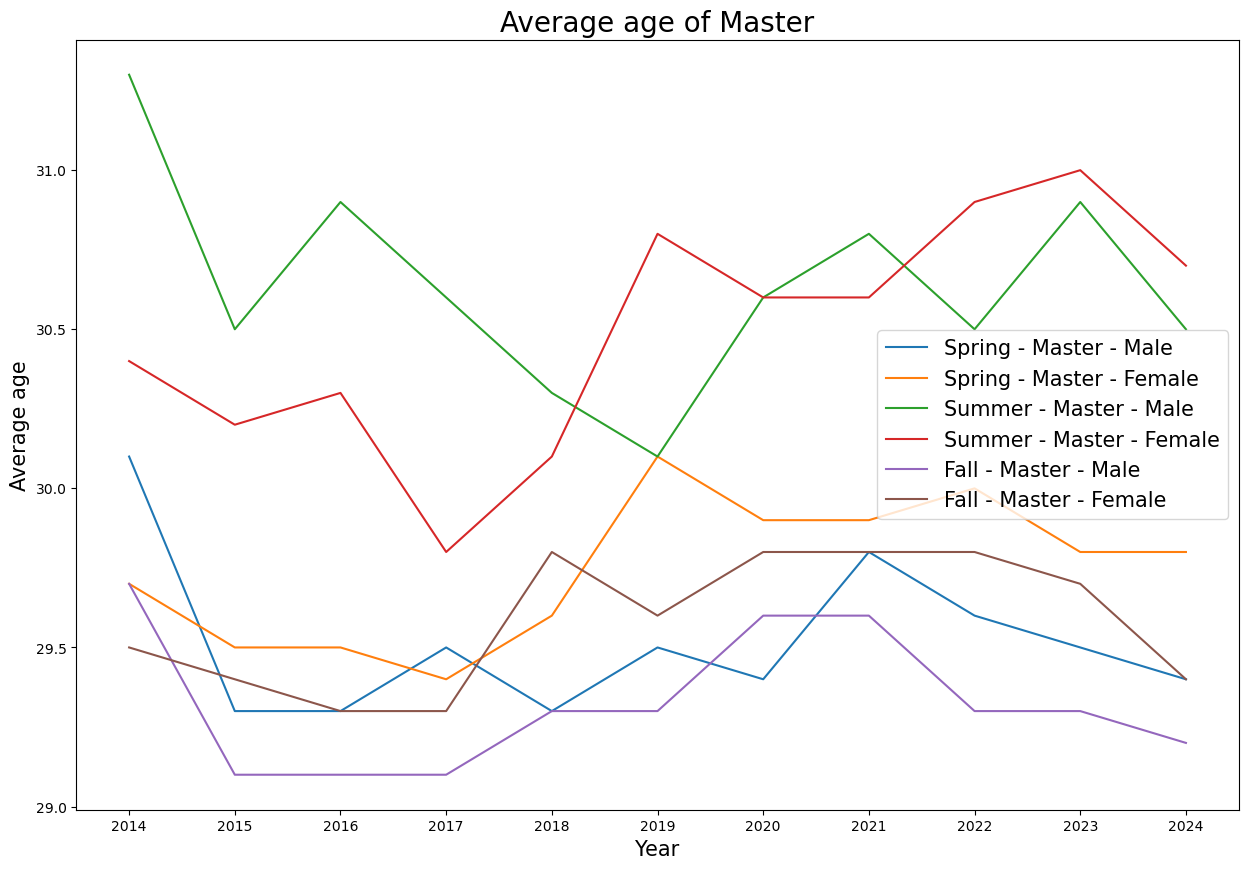

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Age_Master_Male, label = 'Spring - Master - Male')
plt.plot(students_spring.Year, students_spring.Age_Master_Female, label = 'Spring - Master - Female')
plt.plot(students_summer.Year, students_summer.Age_Master_Male, label = 'Summer - Master - Male')
plt.plot(students_summer.Year, students_summer.Age_Master_Female, label = 'Summer - Master - Female')
plt.plot(students_fall.Year, students_fall.Age_Master_Male, label = 'Fall - Master - Male')
plt.plot(students_fall.Year, students_fall.Age_Master_Female, label = 'Fall - Master - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average age', fontsize=15)
plt.title('Average age of Master', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## International students

In [13]:
international = pd.read_csv('Data/international_students.csv')

In [24]:
international.head()

,Semester,China,India,Vietnam,Nigeria,Saudi_Arabia,South_Korea,Iran,Mexico,Venezuela,Canada,Taiwan,Turkey,Peru,Pakistan,Nepal,Ukraine,Bangladesh,Sri_Lanka
0,Spring 2014,897,791,340,131,100.0,114.0,101.0,102.0,90.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Summer 2014,469,290,78,46,49.0,56.0,74.0,NaN,NaN,34.0,46.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Fall 2014,934,917,320,149,138.0,131.0,124.0,101.0,96.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Spring 2015,837,917,306,154,141.0,119.0,140.0,94.0,96.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Summer 2015,187,191,49,49,91.0,21.0,NaN,29.0,24.0,20.0,NaN,NaN,24.0,24.0,NaN,NaN,NaN,NaN


In [19]:
international_filtered = international.dropna(axis=1).copy()

In [22]:
international_filtered['Term'] = [semester_split[i][0] for i in range(len(international_filtered))]
international_filtered['Year'] = [semester_split[i][1] for i in range(len(international_filtered))]

In [23]:
international_filtered.head()

,Semester,China,India,Vietnam,Nigeria,Term,Year
0,Spring 2014,897,791,340,131,Spring,2014
1,Summer 2014,469,290,78,46,Summer,2014
2,Fall 2014,934,917,320,149,Fall,2014
3,Spring 2015,837,917,306,154,Spring,2015
4,Summer 2015,187,191,49,49,Summer,2015


In [29]:
international_spring = international_filtered[international_filtered.Term == 'Spring'].copy()
international_summer = international_filtered[international_filtered.Term == 'Summer'].copy()
international_fall = international_filtered[international_filtered.Term == 'Fall'].copy()

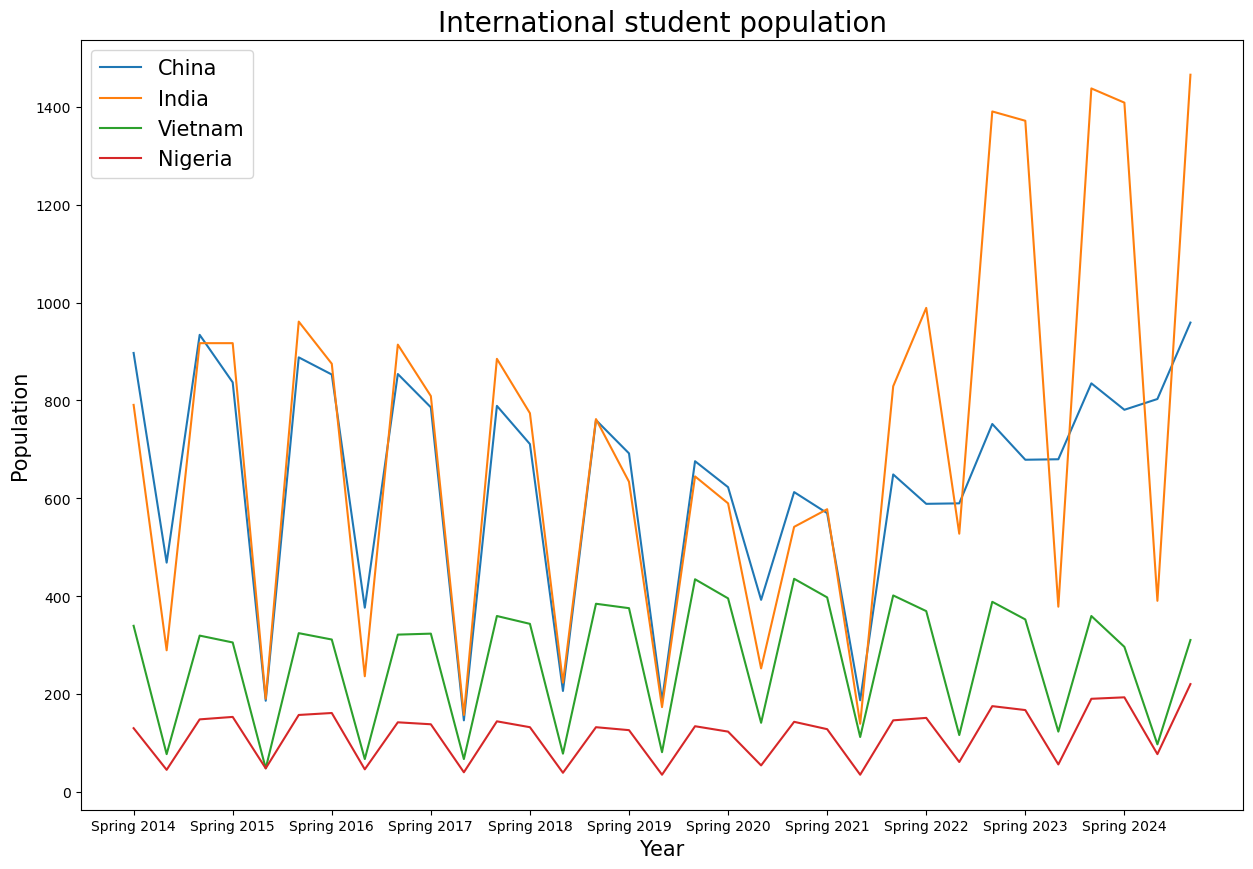

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(international_filtered.Semester, international_filtered.China, label = 'China')
plt.plot(international_filtered.Semester, international_filtered.India, label = 'India')
plt.plot(international_filtered.Semester, international_filtered.Vietnam, label = 'Vietnam')
plt.plot(international_filtered.Semester, international_filtered.Nigeria, label = 'Nigeria')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('International student population', fontsize=20)
plt.xticks([students.Semester.iloc[x] for x in range(0, len(students), 3)])
plt.legend(fontsize = 15)
plt.show()

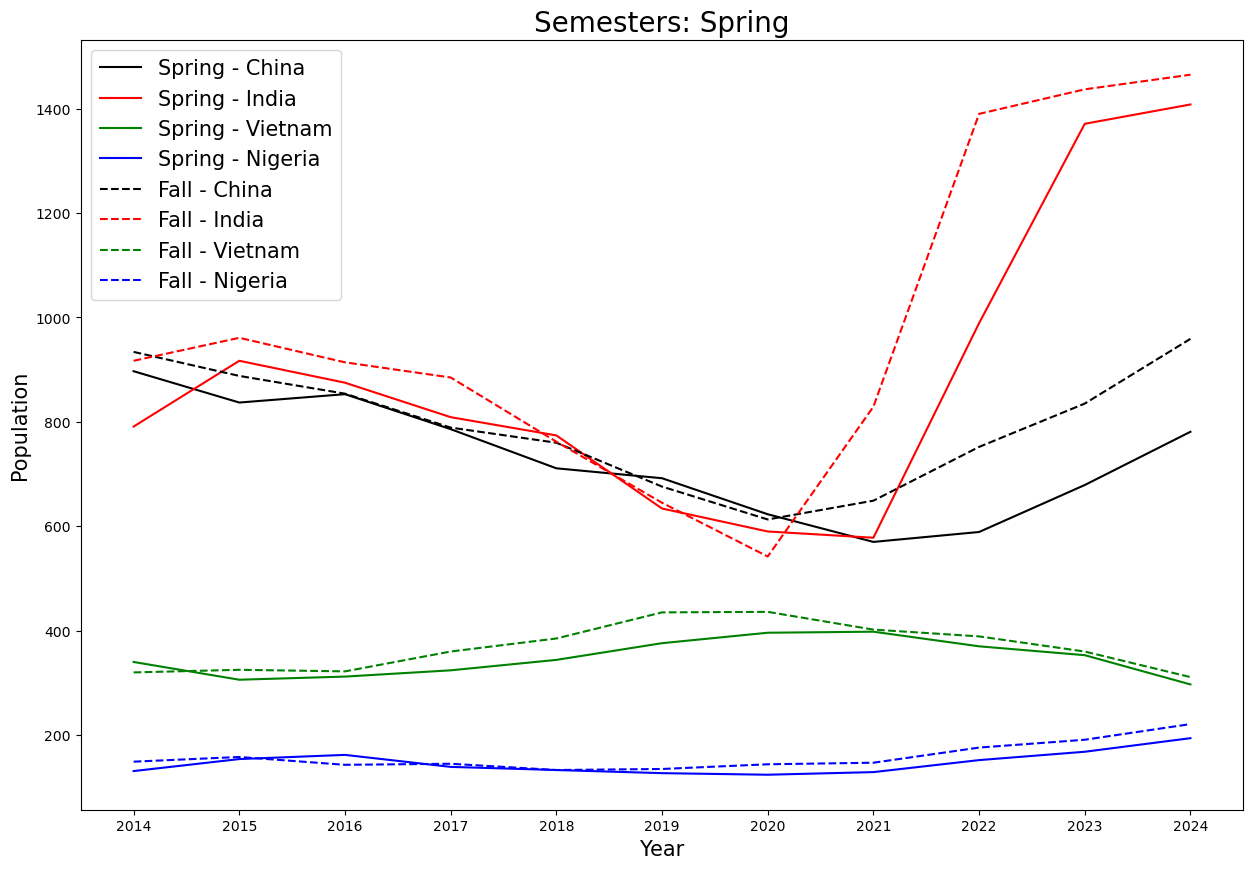

In [34]:
plt.figure(figsize=(15, 10))
plt.plot(international_spring.Year, international_spring.China, color = 'k', label = 'Spring - China')
plt.plot(international_spring.Year, international_spring.India, color = 'r', label = 'Spring - India')
plt.plot(international_spring.Year, international_spring.Vietnam, color = 'g', label = 'Spring - Vietnam')
plt.plot(international_spring.Year, international_spring.Nigeria, color = 'b', label = 'Spring - Nigeria')
plt.plot(international_fall.Year, international_fall.China, linestyle = '--', color = 'k', label = 'Fall - China')
plt.plot(international_fall.Year, international_fall.India, linestyle = '--', color = 'r', label = 'Fall - India')
plt.plot(international_fall.Year, international_fall.Vietnam, linestyle = '--', color = 'g', label = 'Fall - Vietnam')
plt.plot(international_fall.Year, international_fall.Nigeria, linestyle = '--', color = 'b', label = 'Fall - Nigeria')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semesters: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## Rate of drinking among American

[Percentage Americans drinking alcohol](https://news.gallup.com/poll/467507/percentage-americans-drink-alcohol.aspx)

From 2022 statistics, we have the following:

$$ P(\text{men drinking}) = 0.66 $$
$$ P(\text{women drinking}) = 0.61 $$
$$ P(\text{people between 18 to 29 drinking}) = 0.60$$
$$ P(\text{people between 21 to 29 drinking}) = 0.71$$
$$ P(\text{people between 30 to 49 drinking}) = 0.70$$
$$ P(\text{White drinking}) = 0.68$$
$$ P(\text{Black drinking}) = 0.50$$
$$ P(\text{Hispanic drinking}) = 0.59$$

[Young adults' alcohol consumption has decreased.](https://news.gallup.com/poll/648413/alcohol-consumption-increasingly-viewed-unhealthy.aspx)

## Drinking by countries

[Drinking by countries](https://ourworldindata.org/alcohol-consumption)

$$ P(\text{drinking in China}) = 0.559 $$
$$ P(\text{drinking in India}) = 0.388 $$
$$ P(\text{drinking in Vietnam}) = 0.994 $$
$$ P(\text{drinking in Nigeria}) = 0.526 $$ 